# Importo Librerías, descomprimo .zip, conecto a WandB y a Drive :

## Librerías:

In [1]:
!pip3 install -U segmentation-models
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
import numpy as np
import tifffile as tiff
import cv2


from matplotlib import pyplot as plt
import random
import numpy as np

import segmentation_models as sm
from segmentation_models import Unet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 8.5 MB/s 
Segmentation Models: using `keras` framework.


## Drive y descomprimo zip:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Wound Care Center/azh_wound_care_center_dataset_patches.zip', 'r') as zip_ref: # Me crea las carpetas en content, a partir del .zip
    zip_ref.extractall('.')


## WandB Login:

Colab, documentación: 
https://colab.research.google.com/github/wandb/examples/blob/master/colabs/keras/Keras_pipeline_with_Weights_and_Biases.ipynb#scrollTo=sXorUXICumyx

In [4]:
!pip install wandb
import wandb
from wandb.keras import WandbCallback

wandb.login(key="845f113db3338e2a17fdb341af93fac698348802")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 30.0 MB/s 
     |████████████████████████████████| 181 kB 61.0 MB/s 
     |████████████████████████████████| 157 kB 49.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 157 kB 64.7 MB/s 
     |████████████████████████████████| 157 kB 61.8 MB/s 
     |████████████████████████████████| 157 kB 44.3 MB/s 
     |████████████████████████████████| 157 kB 57.3 MB/s 
     |████████████████████████████████| 156 kB 61.3 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=175965106c5d8a5baca25066d93d93104a9d49b3f77b57197344667462f6edbc
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Analizo imágenes de datasets:

## Foot Ulcer Dataset

In [ ]:
imageFootTrain = cv2.imread("/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/train/images/foot-ulcer-0001.png")
labelFootTrain = cv2.imread("/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/train/labels/foot-ulcer-0001.png")
imageFootTest = cv2.imread("/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/test/images/foot-ulcer-0027.png")
labelFootTest = cv2.imread("/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/test/labels/foot-ulcer-0027.png")


### Foot Ulcer Train:

In [ ]:
imageFootTrain.shape, labelFootTrain.shape, np.unique(imageFootTrain), np.unique(labelFootTrain)

((224, 224, 3),
 (224, 224, 3),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 1

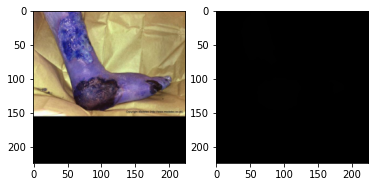

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(imageFootTrain)
axarr[1].imshow(labelFootTrain)

### Foot Ulcer Test:

In [ ]:
imageFootTest.shape, labelFootTest.shape, np.unique(imageFootTest), np.unique(labelFootTest)

((224, 224, 3),
 (224, 224, 3),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 1

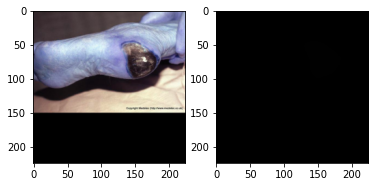

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(imageFootTest)
axarr[1].imshow(labelFootTest)

## Azh Dataset

In [ ]:
imageAzhTrain = cv2.imread("/content/train/images/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelAzhTrain = cv2.imread("/content/train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
imageAzhTest = cv2.imread("/content/test/images/b23232898bafcf304b2138af86be40b9_0.png")
labelAzhTest = cv2.imread("/content/test/labels/b23232898bafcf304b2138af86be40b9_0.png")

### Azh Train:

In [ ]:
imageAzhTrain.shape, labelAzhTrain.shape, np.unique(imageAzhTrain), np.unique(labelAzhTrain)

((224, 224, 3),
 (224, 224, 3),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 1

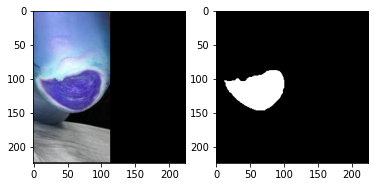

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(imageAzhTrain)
axarr[1].imshow(labelAzhTrain)

### Azh Test:

In [ ]:
imageAzhTest.shape, labelAzhTest.shape, np.unique(imageAzhTest), np.unique(labelAzhTest)

((224, 224, 3),
 (224, 224, 3),
 array([  0,  35,  47,  52,  53,  54,  56,  57,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 2

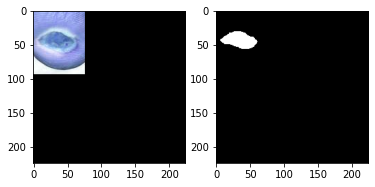

In [ ]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(imageAzhTest)
axarr[1].imshow(labelAzhTest)

## Observaciones:

**Para ver a futuro:**


-Fondo Negro Azh (crop?, resize?)

-Distribución de pixeles en las imágenes?

### Tema BGR o RGB:

Se ve en negativo xq OpenCV (cv2.imread) lee por default BGR. Es decir un pixel que es [255,0,0] lo ve como azul en lugar de rojo. Con lo cual como mis imágenes deben estar en RGB las lee invertidas en color. Se puede solucionar muy fácil con:



```
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
```

Es importante ver que esto invierte los valores: 


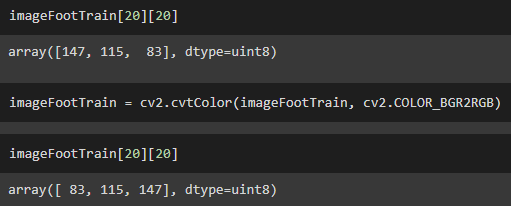

Con lo cual, supongo que no hace falta cambiar las imágenes a color, los valores con los que trabaja la red neuronal son los mismos solo que invertidos. Lo importante (creo) es que todas las imágenes que entran a la red entren de la misma forma!!. Están entrando tal como vienen del .png, que se vean invertidas es solo xq cv2 las lee al revés, si las quiero ver bien aplico la transformación sin afectar las entradas del modelo y ya está.



### Tema cv2.imread(path, NÚMERO):

El segundo parámetro:

Less than zero, in which case the image will be loaded as it is, i.e. it will include all the channels in the original image.


Equal to zero, in which case the image will be loaded in grayscale hence will have only a single channel with pixel values between 0–255


Greater than zero, in which the the image is read in BGR formate, therefore the image will have 3 channels one each for blue, green and red.

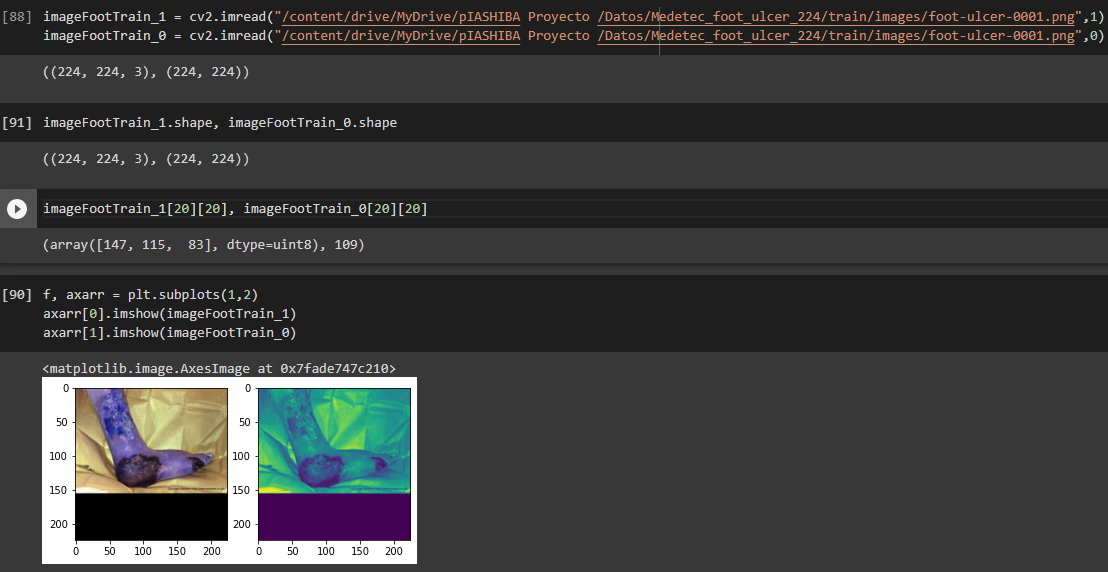

Notar que es la MISMA imágen pero que cuando el param. toma 0 su última dimensión pasa de ser 3 a ser solo 1, por eso sería como grayscale. Lo que sucede en la segunda es que toma los valores más altos como amarillos y los más bajos como violeta, en el medio quedan verdes más o menos. Por eso después se va a ver como las labels son amarillo-violeta a diferencia de las images.

Es más interesante cuando se comparan las labels, ya que si bien en ambos datasets tienen la misma dimensión, en las de Foot Ulcer toma valores 0 o 1, mientras que las de Azh toma 0 o 255. 

**Foot Ulcer Label:**
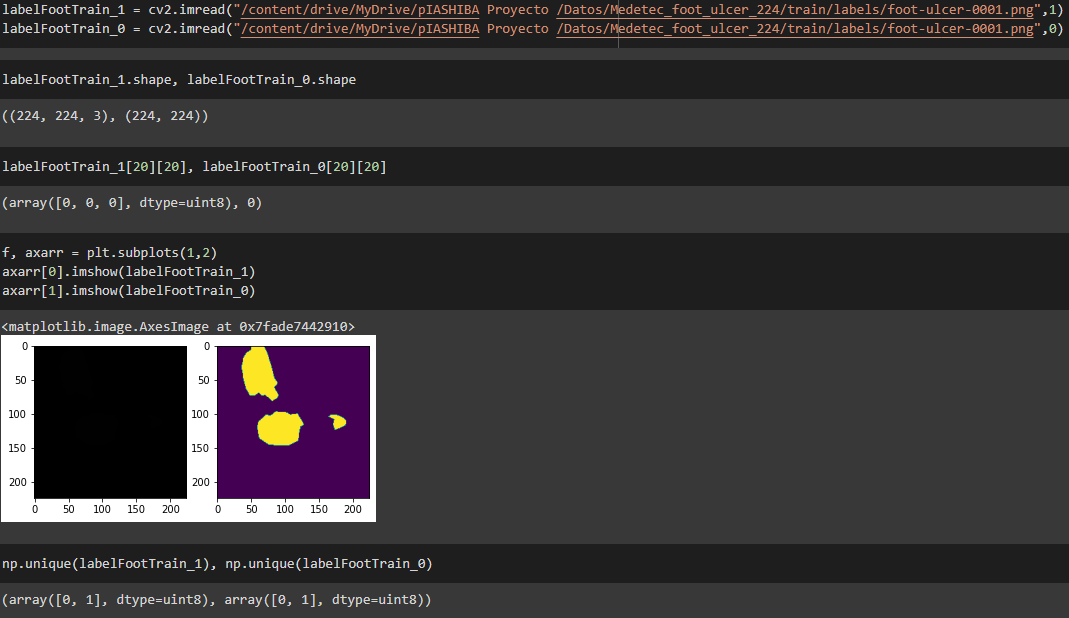

La primera imágen con el param = 1, se ve en negro porque la lee con dimensión 3, en RGB y tiene solo valores [0,0,0] o [1,1,1], es decir o Negro puro o Negro prácticamente Puro.
En cambio cuando uso 0 de param. es solo 1 dim, donde toma valores 0 o 1. Imshow entiende q es grayscale y supongo que escala los valores de froma tal que el más alto es amarillo y el más bajo violeta. 

**Azh label:**

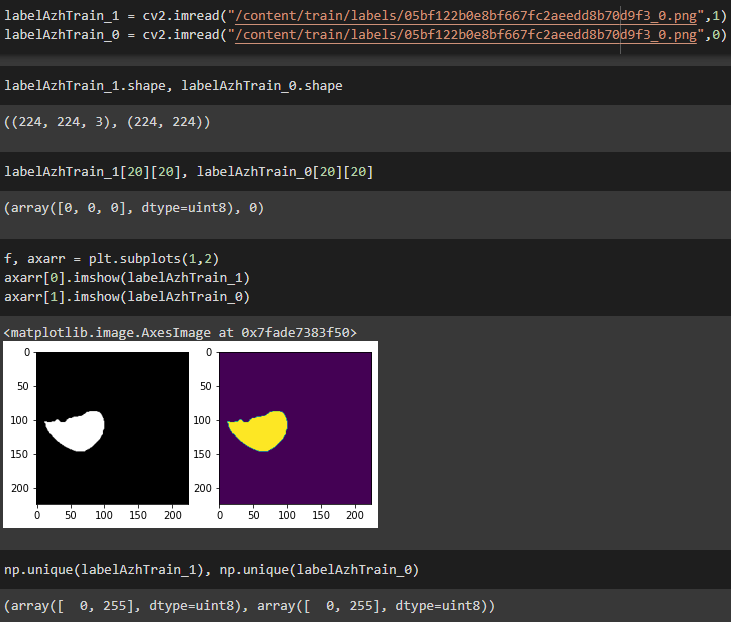

Acá, a diferencia del caso anterior, las imágenes toman valores RGB [255,255,255] o [0,0,0], con lo cual cuando plotea en RGB los valores son puramente Blancos o Negros.

Cuando uso 0 pasa a ser grayscale (1 dim) donde toma 0 ó 255 y supongo que los escala donde amarillo es lo más alto y violeta lo más bajo (como antes)

**Aclaración:**

En este caso:

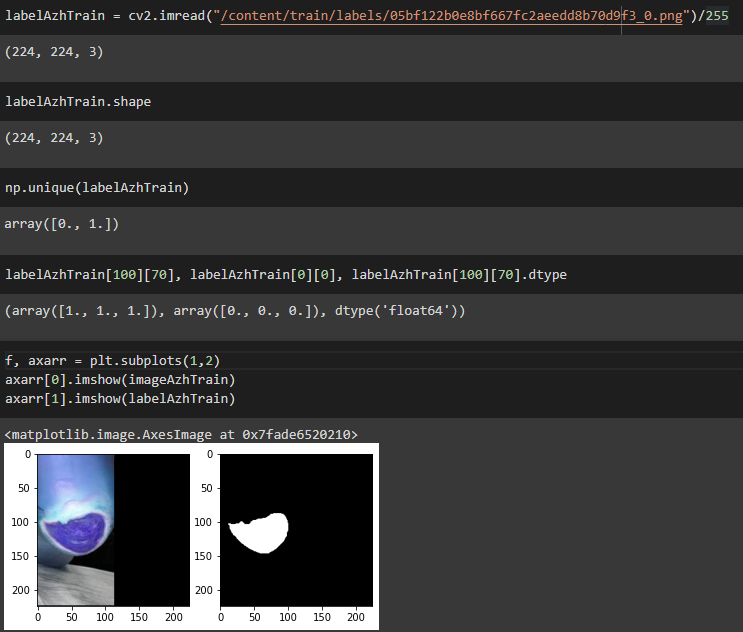

Se puede notar que sí se ve la imagen a pesar de ser RGB y tomar valores únicamente de [0,0,0] y [1,1,1] . Esto se debe a que esos valores del array, en lugar de ser de tipo "uint8", donde puede tomar valores de 8 bit, es decir de 0 a 255, son de tipo float, con lo cual puede tomar valores muy muy negativos o muy muy positivos y por lo tanto (supongooo) imshow entiende ahí que si los valores son únicamente 0 o 1 es porque lo que es 0 es negro y lo que es 1 es blanco.

Acá se puede ver cómo cuando divido por 255 pasa de tener valores uint8 a float64:

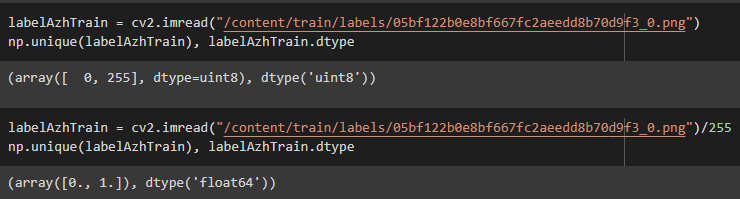

## Conclusiones para pre-procesamiento:

Dado que el pre procesamiento del github del paper está hecho para las imágenes del dataset de Foot Ulcer Pressure, voy a preprocesar las imágenes del dataset Azh para que queden lo más parecidas posible a las del de Foot Ulcer, donde la principal diferencia es que sus labels toman valores 0,1 en lugar de 0,255.
Con lo cual lo que busco es que mis labels de Azh, para ser iguales a las de Foot Ulcer, tengan valores de 0 y 1 y sean de tipo uint8 (ojo porque cuando divido por 255 pueden cambiar de uint8 a float64)

Después debería ver como preprocesar las partes negras de las imágenes, si debo hacer resize y todo eso..., también veré si sirve hacer data augmentation transformando las imágenes. 

# Pre-procesamiento:

Busco, entre otras cosas, crear un dataset común que junte todas las imágenes en un mismo formato para luego alimentar al modelo.
Uso una función parecida a una que había creado en el colab anterior, después si quiero que coincidan images con labels xq hubo algún error, podría recurrir al parametro filename_list de esa función vieja (que acá lo saqué). En este Colab comento lo de grayscale por ejemplo xq quiero que sea HxWx3 y que desp pase a HxWx1 con el preprocesamiento del codigo q saco de github (Datagen), así son iguales a los inputs de Foot Ulcer y se procesan igual.

## Preproceso labels: hago que sus valores pasen de [0,255] a [0,1]
También uso BGR2RGB porque si no me quedaban invertidos los pixeles comparados con las originales

### Preprocesamiento: (esto debería correrlo una sola vez y ya está porque estoy creando la carpeta en Drive)

#### Carpetas y paths:

In [ ]:
# Creo carpetas
path = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/"
os.mkdir(f"{path}train")
os.mkdir(f"{path}test")

pathLabelsTrainProcesado = f"{path}train/labels/"
pathLabelsTestProcesado = f"{path}test/labels/"
pathImagesTrainProcesado = f"{path}train/images/"
pathImagesTestProcesado = f"{path}test/images/"

os.mkdir(pathLabelsTrainProcesado)
os.mkdir(pathLabelsTestProcesado)
os.mkdir(pathImagesTrainProcesado)
os.mkdir(pathImagesTestProcesado)

# Path a imagenes orginiales que voy a procesar para subir a las carpetas creadas
pathLabelsTrainOriginal = "/content/train/labels/"
pathLabelsTestOriginal = "/content/test/labels"
pathImagesTrainOriginal = "/content/train/images"
pathImagesTestOriginal = "/content/test/images"



#### Preproceso:

In [ ]:
# Preproceso y guardo las labels de train y test en las carpetas creadas:


for i in (os.listdir(pathLabelsTrainOriginal)):
   img = cv2.imread(f"{pathLabelsTrainOriginal}/{i}") # label original
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img[img<255] = 0    
   img[img==255] = 1
   img = np.array(img).astype(np.uint8) # en uint8 para que sea como las de Foot Ulcer

   pathSave = f"{pathLabelsTrainProcesado}/{i}" # donde voy a guardarlo con el nomrbe del archivo = i
   tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 
   
for i in (os.listdir(pathLabelsTestOriginal)):
   img = cv2.imread(f"{pathLabelsTestOriginal}/{i}") # label original
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img[img<255] = 0    
   img[img==255] = 1
   img = np.array(img).astype(np.uint8) # en uint8 para que sea como las de Foot Ulcer

   pathSave = f"{pathLabelsTestProcesado}/{i}" # donde voy a guardarlo con el nomrbe del archivo = i
   tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

# Guardo directamente las images de train y test en las carpetas creadas (no requieren preprocesamiento):

for i in (os.listdir(pathImagesTrainOriginal)):
   img = cv2.imread(f"{pathImagesTrainOriginal}/{i}") # label original
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = np.array(img).astype(np.uint8) # en uint8 para que sea como las de Foot Ulcer

   pathSave = f"{pathImagesTrainProcesado}/{i}" # donde voy a guardarlo con el nomrbe del archivo = i
   tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

for i in (os.listdir(pathImagesTestOriginal)):
   img = cv2.imread(f"{pathImagesTestOriginal}/{i}") # label original
   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   img = np.array(img).astype(np.uint8) # en uint8 para que sea como las de Foot Ulcer

   pathSave = f"{pathImagesTestProcesado}/{i}" # donde voy a guardarlo con el nomrbe del archivo = i
   tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

## Verifico que esté bien:

In [ ]:
pathOriginal = "/content/"
pathProcesado = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/"

### Labels Procesadas:

In [ ]:
labelTrainProcesado = cv2.imread(f"{pathProcesado}train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTestProcesado = cv2.imread(f"{pathProcesado}test/labels/b586407933e66b112820f28448783627_0.png")

labelTrainProcesado.shape, labelTestProcesado.shape, np.unique(labelTrainProcesado), np.unique(labelTestProcesado)

((224, 224, 3),
 (224, 224, 3),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8))

### Images Procesadas:

In [ ]:
imageTrainProcesado = cv2.imread(f"{pathProcesado}train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTestProcesado = cv2.imread(f"{pathProcesado}test/images/b23232898bafcf304b2138af86be40b9_0.png")

imageTrainProcesado.shape, imageTestProcesado.shape, np.unique(imageTrainProcesado), np.unique(imageTestProcesado)

### Comparo pixel images Original vs Procesado: para ver que no esté invertido (por eso usé COLOR_BGR2RGB en el preprocesado)

In [ ]:
imageTrainOriginal =  cv2.imread("/content/train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTrainProcesado =  cv2.imread(f"{pathProcesado}train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTrainOriginal[5][5], imageTrainProcesado[5][5]

(array([ 87, 124, 182], dtype=uint8), array([ 87, 124, 182], dtype=uint8))

In [ ]:
labelTrainOriginal =  cv2.imread("/content/train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTrainProcesado =  cv2.imread(f"{pathProcesado}train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTrainOriginal[100][50], labelTrainProcesado[100][50]

(array([255, 255, 255], dtype=uint8), array([1, 1, 1], dtype=uint8))

Esto último está bien que cambie, porque es lo que pre-procesé

## Preprocesamiento: Unifico Datasets

Código para juntar los datasets preprocesados en un df de pandas con los paths a los distintos archivos. Voy a hacer uno para train donde junte todo train y otro para test donde junte todo test. Podría hacer uno general y desp hacer los splits pero lo hago así xq los datasets que tengo ya me vienen divididos en train y test (Supongo además que están predefinidos los splits de la forma más óptima)

Es importante tener en cuenta que un dataset contiene imágenes únicamente de pie (Foot Ulcer), mientras que el otro tiene un poco de todo. Con esto puedo ver a futuro si conviene hacer un mismo modelo para ambos casos que generalice bien o es mejor hacerlo de forma particular para cada caso. 

Aprovecho que las images tienen exactamente el mismo nombre que las labels, para iterar solo por images como se ve más abajo. 

Así me aseguro también que coincidan imágenes con labels (aunque desues el DataGen hace un .sort() que seguro hace que quede todo igualmente ordenado)

### Azh train:

In [ ]:
df_azh_train = pd.DataFrame()

path_azh_train_images = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/train/images/"
path_azh_train_labels = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/train/labels/"

lista_path_azh_train_images =[path_azh_train_images + nombreArchivo for nombreArchivo in os.listdir(path_azh_train_images)]
lista_path_azh_train_labels =[path_azh_train_labels + nombreArchivo for nombreArchivo in os.listdir(path_azh_train_images)]
# Notar que para labels también itero por nombres de images, aprovechando que coinciden los nombres y asegurandome que coincidan.


df_azh_train['image_path'] = lista_path_azh_train_images
df_azh_train['label_path'] = lista_path_azh_train_labels

df_azh_train
df_azh_train.head(5)

,image_path,label_path
0,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
1,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
2,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
3,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
4,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...


### Azh test:

In [ ]:
df_azh_test = pd.DataFrame()

path_azh_test_images = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/test/images/"
path_azh_test_labels = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Azh/test/labels/"

lista_path_azh_test_images =[path_azh_test_images + nombreArchivo for nombreArchivo in os.listdir(path_azh_test_images)]
lista_path_azh_test_labels =[path_azh_test_labels + nombreArchivo for nombreArchivo in os.listdir(path_azh_test_images)]
# Notar que para labels también itero por nombres de images, aprovechando que coinciden los nombres y asegurandome que coincidan.


df_azh_test['image_path'] = lista_path_azh_test_images
df_azh_test['label_path'] = lista_path_azh_test_labels

df_azh_test
df_azh_test.head(5)



Foot Ulcer:

### Foot Ulcer train:

In [ ]:
df_fu_train = pd.DataFrame()

path_fu_train_images = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/train/images/"

path_fu_train_labels = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/train/labels/"

lista_path_fu_train_images =[path_fu_train_images + nombreArchivo for nombreArchivo in os.listdir(path_fu_train_images)]
lista_path_fu_train_labels =[path_fu_train_labels + nombreArchivo for nombreArchivo in os.listdir(path_fu_train_images)]
# Notar que para labels también itero por nombres de images, aprovechando que coinciden los nombres y asegurandome que coincidan.


df_fu_train['image_path'] = lista_path_fu_train_images
df_fu_train['label_path'] = lista_path_fu_train_labels

df_fu_train
df_fu_train.head(5)

### Foot Ulcer test:

In [ ]:
df_fu_test = pd.DataFrame()

path_fu_test_images = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/test/images/"

path_fu_test_labels = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Medetec_foot_ulcer_224/test/labels/"

lista_path_fu_test_images =[path_fu_test_images + nombreArchivo for nombreArchivo in os.listdir(path_fu_test_images)]
lista_path_fu_test_labels =[path_fu_test_labels + nombreArchivo for nombreArchivo in os.listdir(path_fu_test_images)]
# Notar que para labels también itero por nombres de images, aprovechando que coinciden los nombres y asegurandome que coincidan.


df_fu_test['image_path'] = lista_path_fu_test_images
df_fu_test['label_path'] = lista_path_fu_test_labels

df_fu_test
df_fu_test.head(5)

,image_path,label_path
0,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
1,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
2,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
3,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...
4,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...,/content/drive/MyDrive/pIASHIBA Proyecto /Dato...


### Concateno dataframes:

In [ ]:
df_azh_train.shape, df_azh_test.shape, df_fu_train.shape, df_fu_test.shape

((831, 2), (278, 2), (152, 2), (8, 2))

In [ ]:
df_train = pd.concat([df_azh_train, df_fu_train], axis=0)
df_test = pd.concat([df_azh_test, df_fu_test], axis=0)

df_train.shape, df_test.shape

((983, 2), (286, 2))

### Cargo archivos a carpeta con todo unificado:

#### train images:

In [ ]:
path_images_train_unificado = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Datos Unificados/train/images"

for i in (df_train["image_path"]):
  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img).astype(np.uint8)

  nombre_archivo = i.split("/")[-1]
  pathSave = f"{path_images_train_unificado}/{nombre_archivo}"
  tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

#### train labels:

In [ ]:
path_labels_train_unificado= "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Datos Unificados/train/labels"

for i in (df_train["label_path"]):
  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img).astype(np.uint8)

  nombre_archivo = i.split("/")[-1]
  pathSave = f"{path_labels_train_unificado}/{nombre_archivo}"
  tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

#### test images:

In [ ]:
path_images_test_unificado = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Datos Unificados/test/images"

for i in (df_test["image_path"]):
  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img).astype(np.uint8)

  nombre_archivo = i.split("/")[-1]
  pathSave = f"{path_images_test_unificado}/{nombre_archivo}"
  tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

#### train labels:

In [ ]:
path_labels_test_unificado= "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Datos Unificados/test/labels"

for i in (df_test["label_path"]):
  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img).astype(np.uint8)

  nombre_archivo = i.split("/")[-1]
  pathSave = f"{path_labels_test_unificado}/{nombre_archivo}"
  tf.keras.utils.save_img(
    pathSave, img, data_format="channels_last", file_format="png", scale=False) 

## Verifico que esté bien: (2)

In [ ]:
pathOriginal = "/content/"
pathProcesado = "/content/drive/MyDrive/pIASHIBA Proyecto /Datos/Datos Unificados/"

### Labels Procesadas:

In [ ]:
labelTrainProcesado = cv2.imread(f"{pathProcesado}train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTestProcesado = cv2.imread(f"{pathProcesado}test/labels/b586407933e66b112820f28448783627_0.png")

labelTrainProcesado.shape, labelTestProcesado.shape, np.unique(labelTrainProcesado), np.unique(labelTestProcesado)

((224, 224, 3),
 (224, 224, 3),
 array([0, 1], dtype=uint8),
 array([0, 1], dtype=uint8))

### Images Procesadas:

In [ ]:
imageTrainProcesado = cv2.imread(f"{pathProcesado}train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTestProcesado = cv2.imread(f"{pathProcesado}test/images/b23232898bafcf304b2138af86be40b9_0.png")

imageTrainProcesado.shape, imageTestProcesado.shape, np.unique(imageTrainProcesado), np.unique(imageTestProcesado)

((224, 224, 3),
 (224, 224, 3),
 array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 1

### Comparo pixel images Original vs Procesado: para ver que no esté invertido (por eso usé COLOR_BGR2RGB en el preprocesado)

In [ ]:
imageTrainOriginal =  cv2.imread("/content/train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTrainProcesado =  cv2.imread(f"{pathProcesado}train/images/0020126b06a719c36fed196c2c71f2f0_0.png")
imageTrainOriginal[5][5], imageTrainProcesado[5][5]

(array([ 87, 124, 182], dtype=uint8), array([ 87, 124, 182], dtype=uint8))

In [ ]:
labelTrainOriginal =  cv2.imread("/content/train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTrainProcesado =  cv2.imread(f"{pathProcesado}train/labels/05bf122b0e8bf667fc2aeedd8b70d9f3_0.png")
labelTrainOriginal[100][50], labelTrainProcesado[100][50]

(array([255, 255, 255], dtype=uint8), array([1, 1, 1], dtype=uint8))

Esto último está bien que cambie, porque es lo que pre-procesé

# Modelado: 



### Métricas:

In [18]:
# ------------------------------------------------------------ #
#
# file : metrics.py
# author : CM
# Metrics for evaluation
#
# ------------------------------------------------------------ #
from keras import backend as K


# dice coefficient
'''
def dice_coef(y_true, y_pred, smooth=1.):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
'''
# the deeplab version of dice coefficient
def dice_coef(y_true, y_pred):
    smooth = 0.00001
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / ((K.sum(y_true_f) + K.sum(y_pred_f)) + smooth)
    return score

def iou_score_yo(y_true, y_pred): # corrí un modelo comparandolo con el iou_score de sm y da nada que ver , seguro está mal este así que uso el otro directamente.
    smooth = 0.00001
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = (K.sum(intersection) + smooth) / (((K.sum(y_true_f) + K.sum(y_pred_f)) - K.sum(intersection)) + smooth)
    return score



# Recall (true positive rate)
def recall(truth, prediction):
    TP = K.sum(K.round(K.clip(truth * prediction, 0, 1)))
    P = K.sum(K.round(K.clip(truth, 0, 1)))
    return TP / (P + K.epsilon())


# Specificity (true negative rate)
def specificity(truth, prediction):
    TN = K.sum(K.round(K.clip((1-truth) * (1-prediction), 0, 1)))
    N = K.sum(K.round(K.clip(1-truth, 0, 1)))
    return TN / (N + K.epsilon())


# Precision (positive prediction value)
def precision(truth, prediction):
    TP = K.sum(K.round(K.clip(truth * prediction, 0, 1)))
    FP = K.sum(K.round(K.clip((1-truth) * prediction, 0, 1)))
    return TP / (TP + FP + K.epsilon())


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))


### Datagen y algunas funciones prácticas (normalize, get , load, save, ...):

In [17]:
import random
class DataGen:

    def __init__(self, path, split_ratio, x, y, color_space='rgb', subset = False, num_samples = 100): # le agregué para poder hacer subsets tb.
        self.x = x
        self.y = y
        self.path = path
        self.color_space = color_space
        self.path_train_images = path + "train/images/"
        self.path_train_labels = path + "train/labels/"
        self.path_test_images = path + "test/images/"
        self.path_test_labels = path + "test/labels/"
        self.image_file_list = get_png_filename_list(self.path_train_images)
        self.label_file_list = get_png_filename_list(self.path_train_labels)

        if subset == True:
           self.image_file_list[:], self.label_file_list[:] = self.subsetear(num_samples) # notar que este sampleo es ANTES de dividir en train y val, con lo cual num_samples >= cant de imagenes de train. Sería = si el split ratio es 0 (todas las imgs train, ninguna val)
        
        self.image_file_list[:], self.label_file_list[:] = self.shuffle_image_label_lists_together()

        self.split_index = int(split_ratio * len(self.image_file_list))
        self.x_train_file_list = self.image_file_list[self.split_index:]
        self.y_train_file_list = self.label_file_list[self.split_index:]
        self.x_val_file_list = self.image_file_list[:self.split_index]
        self.y_val_file_list = self.label_file_list[:self.split_index]
        self.x_test_file_list = get_png_filename_list(self.path_test_images)
        self.y_test_file_list = get_png_filename_list(self.path_test_labels)


    def generate_data(self, batch_size, train=False, val=False, test=False):
        """Replaces Keras' native ImageDataGenerator."""
        try:
            if train is True:
                image_file_list = self.x_train_file_list
                label_file_list = self.y_train_file_list
            elif val is True:
                image_file_list = self.x_val_file_list
                label_file_list = self.y_val_file_list
            elif test is True:
                image_file_list = self.x_test_file_list
                label_file_list = self.y_test_file_list
        except ValueError:
            print('one of train or val or test need to be True')

        i = 0
        while True:
            image_batch = []
            label_batch = []
            for b in range(batch_size):
                if i == len(self.x_train_file_list):
                    i = 0
                if i < len(image_file_list):
                    sample_image_filename = image_file_list[i]
                    sample_label_filename = label_file_list[i]
                    # print('image: ', image_file_list[i])
                    # print('label: ', label_file_list[i])
                    if train or val:
                        image = cv2.imread(self.path_train_images + sample_image_filename, 1)
                        label = cv2.imread(self.path_train_labels + sample_label_filename, 0)
                    elif test is True:
                        image = cv2.imread(self.path_test_images + sample_image_filename, 1)
                        label = cv2.imread(self.path_test_labels + sample_label_filename, 0)
                    # image, label = self.change_color_space(image, label, self.color_space)
                    label = np.expand_dims(label, axis=2)
                    if image.shape[0] == self.x and image.shape[1] == self.y:
                        image_batch.append(image.astype("float32"))
                    else:
                        print('the input image shape is not {}x{}'.format(self.x, self.y))
                    if label.shape[0] == self.x and label.shape[1] == self.y:
                        label_batch.append(label.astype("float32"))
                    else:
                        print('the input label shape is not {}x{}'.format(self.x, self.y))
                i += 1
            if image_batch and label_batch:
                image_batch = normalize(np.array(image_batch))
                label_batch = normalize(np.array(label_batch))
                yield (image_batch, label_batch)

    def get_num_data_points(self, train=False, val=False): # uso data_gen.get_num_data_points y me devuelve cant de imágenes
        try:
            image_file_list = self.x_train_file_list if val is False and train is True else self.x_val_file_list
        except ValueError:
            print('one of train or val need to be True')

        return len(image_file_list)



    def shuffle_image_label_lists_together(self):
        combined = list(zip(self.image_file_list, self.label_file_list))
        random.shuffle(combined)
        return zip(*combined)
    
    def subsetear(self, num_samples): # cree esta función para poder entrenar más rápido. Me crea subset de datos
        combined = list(zip(self.image_file_list, self.label_file_list)) # esto para que coincidan los elementos de ambas listas
        combined = random.sample(combined,num_samples)
        return zip(*combined)


    @staticmethod
    def change_color_space(image, label, color_space):
        if color_space.lower() is 'hsi' or 'hsv':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            label = cv2.cvtColor(label, cv2.COLOR_BGR2HSV)
        elif color_space.lower() is 'lab':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            label = cv2.cvtColor(label, cv2.COLOR_BGR2LAB)
        return image, label
def normalize(arr):
    diff = np.amax(arr) - np.amin(arr)
    diff = 255 if diff == 0 else diff
    arr = arr / np.absolute(diff)
    return arr


def get_png_filename_list(path):
    file_list = []
    for FileNameLength in range(0, 500):
        for dirName, subdirList, fileList in os.walk(path):
            for filename in fileList:
                # check file extension
                if ".png" in filename.lower() and len(filename) == FileNameLength:
                    file_list.append(filename)
            break
    file_list.sort()
    return file_list


def get_jpg_filename_list(path):
    file_list = []
    for FileNameLength in range(0, 500):
        for dirName, subdirList, fileList in os.walk(path):
            for filename in fileList:
                # check file extension
                if ".jpg" in filename.lower() and len(filename) == FileNameLength:
                    file_list.append(filename)
            break
    file_list.sort()
    return file_list


def load_jpg_images(path):
    file_list = get_jpg_filename_list(path)
    temp_list = []
    for filename in file_list:
        img = cv2.imread(path + filename, 1)
        temp_list.append(img.astype("float32"))

    temp_list = np.array(temp_list)
    # x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
    return temp_list, file_list


def load_png_images(path):

    temp_list = []
    file_list = get_png_filename_list(path)
    for filename in file_list:
        img = cv2.imread(path + filename, 1)
        temp_list.append(img.astype("float32"))

    temp_list = np.array(temp_list)
    #temp_list = np.reshape(temp_list,(temp_list.shape[0], temp_list.shape[1], temp_list.shape[2], 3))
    return temp_list, file_list


def load_data(path):
    # path_train_images = path + "train/images/padded/"
    # path_train_labels = path + "train/labels/padded/"
    # path_test_images = path + "test/images/padded/"
    # path_test_labels = path + "test/labels/padded/"
    path_train_images = path + "train/images/"
    path_train_labels = path + "train/labels/"
    path_test_images = path + "test/images/"
    path_test_labels = path + "test/labels/"
    x_train, train_image_filenames_list = load_png_images(path_train_images)
    y_train, train_label_filenames_list = load_png_images(path_train_labels)
    x_test, test_image_filenames_list = load_png_images(path_test_images)
    y_test, test_label_filenames_list = load_png_images(path_test_labels)
    x_train = normalize(x_train)
    y_train = normalize(y_train)
    x_test = normalize(x_test)
    y_test = normalize(y_test)
    return x_train, y_train, x_test, y_test, test_label_filenames_list


def load_test_images(path):
    path_test_images = path + "test/images/"
    x_test, test_image_filenames_list = load_png_images(path_test_images)
    x_test = normalize(x_test)
    return x_test, test_image_filenames_list


def save_results(np_array, color_space, outpath, test_label_filenames_list):
    i = 0
    for filename in test_label_filenames_list:
        # predict_img = np.reshape(predict_img,(predict_img[0],predict_img[1]))
        pred = np_array[i]
        # if color_space.lower() is 'hsi' or 'hsv':
        #     pred = cv2.cvtColor(pred, cv2.COLOR_HSV2RGB)
        # elif color_space.lower() is 'lab':
        #     pred = cv2.cvtColor(pred, cv2.COLOR_Lab2RGB)
        cv2.imwrite(outpath + filename, pred * 255.)
        i += 1


def save_rgb_results(np_array, outpath, test_label_filenames_list):
    i = 0
    for filename in test_label_filenames_list:
        # predict_img = np.reshape(predict_img,(predict_img[0],predict_img[1]))
        cv2.imwrite(outpath + filename, np_array[i] * 255.)
        i += 1


def save_history(model, model_name, training_history, dataset, n_filters, epoch, learning_rate, loss,
                 color_space, path=None, temp_name=None):
    save_weight_filename = temp_name if temp_name else str(datetime.datetime.now())
    model.save('{}{}.hdf5'.format(path, save_weight_filename))
    with open('{}{}.json'.format(path, save_weight_filename), 'w') as f:
        json.dump(training_history.history, f, indent=2)

    json_list = ['{}{}.json'.format(path, save_weight_filename)]
    for json_filename in json_list:
        with open(json_filename) as f:
            # convert the loss json object to a python dict
            loss_dict = json.load(f)
        print_list = ['loss', 'val_loss', 'dice_coef', 'val_dice_coef']
        for item in print_list:
            item_list = []
            if item in loss_dict:
                item_list.extend(loss_dict.get(item))
                plt.plot(item_list)
        plt.title('model:{} lr:{} epoch:{} #filtr:{} Colorspaces:{}'.format(model_name, learning_rate,
                                                                            epoch, n_filters, color_space))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train_loss', 'test_loss', 'train_dice', 'test_dice'], loc='upper left')
        plt.savefig('{}{}.png'.format(path, save_weight_filename))
        plt.show()
        plt.clf()

def num_samples(num_samples, subset):
  if subset:
    n_samples = num_samples
  else:
    n_samples = "No subset"
  return n_samples

### 🎋 Configs


In [20]:
#dataset = "Medetec_foot_ulcer_224"
dataset = "Azh"
#dataset = "Datos Unificados"

subset = True
nro_samples = num_samples(40, subset) # 400 si subset es False devuelve que no hay subset, para que no quede mal en la tabla de WandB y ahorrarme el tener q poner subset true o false en la tabla # si tengo 30 samples, sp ratio 0.2 y batchsize 4, entonces voy a tener (24 train, 6 val) --> 6 batches de size 4 para train = 30

spRatio = 0.2
input_dim_x = 224
input_dim_y = 224
backbone_modelo = "inceptionresnetv2"

# por ahora pruebo con Unet, desp puedo probar Linknet, FPN, PSPNet q son compatibles con la libreria segmentation_models. Tengo que vovler a ver q onda la de DeeplabV3 con bbone mobilenetv2 de github.
nombreModeloConfigs = f"SM Unet bb:{backbone_modelo}(imagenet)"
metricasConfigs = [dice_coef, sm.metrics.iou_score, precision, recall] #specificity (TNR), accuracy ??


lossConfigs = sm.losses.bce_jaccard_loss # CAMBIAR LA CONFIG DE loss SI CAMBIO ESTO!!!!!


configs = dict(   # hiperparámetros del compile y  fit del model --> para tabla de wandb
    data_flag = dataset,
    #subset = subset, # no hace falta poeque si es false puse para que num_samples ponga "No subset"
    subset_samples = nro_samples,
    image_width = input_dim_x,
    image_height = input_dim_y,
    batch_size = 4,
    model_name = nombreModeloConfigs,
    bbone = backbone_modelo,
    split_ratio = spRatio,
    #n_filters = 32,
    #pretrain_weights = 'imagenet',
    epochs = 300,
    init_learning_rate = 1e-4,
    optimizer = 'Adam',
    #loss = 'binary_crossentropy', # Tablero pero también parámetro de compile 
    loss = "SM: bce_jaccard_loss", # Solo para el tablero, para parámetro uso lossConfigs
    # metrics = metricas, #["dice_coef", "precision", "recall"],
    earlystopping_patience = 30
)

In [21]:
data_gen = DataGen(f"/content/drive/MyDrive/pIASHIBA Proyecto /Datos/{dataset}/" , split_ratio = spRatio, x=input_dim_x, y=input_dim_y, subset = subset, num_samples = nro_samples) 
data_gen.get_num_data_points()

8

## Modelos:

Acá puedo elegir entre cargar un modelo ya guardado, o cargar distintos tipos de modelo que quiera entrenar luego.

### Cargo modelos guardados:

Cargo modelos ya entrenados: (sus pesos pueden servir de punto de partida para entrenar modelos de forma más rápida). Los guardé en la solapa Save history. --> al final los guardo con el callback de Checkpoint, ver de no hardcodear el nombre del archivo, usar el nomrbe del run de wandb con la fecha o algo así, así no se sobreescribe siempre el mismo archivo y además los puedo identificar bien

In [29]:
from keras.utils.generic_utils import CustomObjectScope
from keras.models import load_model

tf.keras.backend.clear_session()
model = tf.keras.models.load_model('/content/drive/MyDrive/pIASHIBA Proyecto /Modelos guardados/Checkpoint/bestModel.hdf5', custom_objects={'dice_coef': dice_coef, 'precision':precision, 'recall':recall, 
                                                                                                                                            "binary_crossentropy_plus_jaccard_loss":sm.losses.bce_jaccard_loss, 
                                                                                                                                            #"iou_score_yo":iou_score_yo, 
                                                                                                                                            "iou_score": iou_score_yo #iou_score
                                                                                                                                            })
# aca podría hacer que guarde el modelo con el nombre del run de wandb y la fecha o algo así.

Para cargar un modelo con layers particulares o algo así ?):



```
def modeloGuardado(pathArchivo):
    #path_modelo_entrenado = "/content/drive/MyDrive/pIASHIBA Proyecto /Modelos guardados/2022-07-12 22:29:38.439867.hdf5"

    with CustomObjectScope({'relu6': relu6,'DepthwiseConv2D': DepthwiseConv2D, 'BilinearUpsampling': BilinearUpsampling}):
        model = load_model(pathArchivo
                          , custom_objects={'dice_coef': dice_coef, 'precision':precision, 'recall':recall})
    return model
```



### Modelo github DeeplabV3, backbone mobilenetv2 (pascal):

https://github.dev/uwm-bigdata/wound-segmentation 

In [ ]:
# -*- coding: utf-8 -*-

""" Deeplabv3+ model for Keras.
This model is based on this repo:
https://github.com/bonlime/keras-deeplab-v3-plus

MobileNetv2 backbone is based on this repo:
https://github.com/JonathanCMitchell/mobilenet_v2_keras

# Reference
- [Encoder-Decoder with Atrous Separable Convolution
    for Semantic Image Segmentation](https://arxiv.org/pdf/1802.02611.pdf)
- [Xception: Deep Learning with Depthwise Separable Convolutions]
    (https://arxiv.org/abs/1610.02357)
- [Inverted Residuals and Linear Bottlenecks: Mobile Networks for
    Classification, Detection and Segmentation](https://arxiv.org/abs/1801.04381)
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

from keras.models import Model
from keras import layers
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Add
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import DepthwiseConv2D
from keras.layers import ZeroPadding2D
from keras.layers import AveragePooling2D
from keras.layers import Layer
from tensorflow.keras.layers import InputSpec
from tensorflow.keras.utils import get_source_inputs
from keras import backend as K
from keras.applications import imagenet_utils
from keras.utils import conv_utils
from keras.utils.data_utils import get_file

WEIGHTS_PATH_X = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_MOBILE = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_X_CS = "https://github.com/rdiazgar/keras-deeplab-v3-plus/releases/download/1.2/deeplabv3_xception_tf_dim_ordering_tf_kernels_cityscapes.h5"
WEIGHTS_PATH_MOBILE_CS = "https://github.com/rdiazgar/keras-deeplab-v3-plus/releases/download/1.2/deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels_cityscapes.h5"

class BilinearUpsampling(Layer):
    """Just a simple bilinear upsampling layer. Works only with TF.
       Args:
           upsampling: tuple of 2 numbers > 0. The upsampling ratio for h and w
           output_size: used instead of upsampling arg if passed!
    """

    def __init__(self, upsampling=(2, 2), output_size=None, data_format=None, **kwargs):

        super(BilinearUpsampling, self).__init__(**kwargs)

        self.data_format = K.image_data_format()
        self.input_spec = InputSpec(ndim=4)
        if output_size:
            self.output_size = conv_utils.normalize_tuple(
                output_size, 2, 'output_size')
            self.upsampling = None
        else:
            self.output_size = None
            self.upsampling = conv_utils.normalize_tuple(
                upsampling, 2, 'upsampling')

    def compute_output_shape(self, input_shape):
        if self.upsampling:
            height = self.upsampling[0] * \
                input_shape[1] if input_shape[1] is not None else None
            width = self.upsampling[1] * \
                input_shape[2] if input_shape[2] is not None else None
        else:
            height = self.output_size[0]
            width = self.output_size[1]
        return (input_shape[0],
                height,
                width,
                input_shape[3])

    def call(self, inputs):
        if self.upsampling:
            return tf.compat.v1.image.resize_bilinear(inputs, (inputs.shape[1] * self.upsampling[0],
                                                       inputs.shape[2] * self.upsampling[1]),
                                              align_corners=True)
        else:
            return tf.compat.v1.image.resize_bilinear(inputs, (self.output_size[0],
                                                       self.output_size[1]),
                                              align_corners=True)

    def get_config(self):
        config = {'upsampling': self.upsampling,
                  'output_size': self.output_size,
                  'data_format': self.data_format}
        base_config = super(BilinearUpsampling, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def SepConv_BN(x, filters, prefix, stride=1, kernel_size=3, rate=1, depth_activation=False, epsilon=1e-3):
    """ SepConv with BN between depthwise & pointwise. Optionally add activation after BN
        Implements right "same" padding for even kernel sizes
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & poinwise convs
            epsilon: epsilon to use in BN layer
    """

    if stride == 1:
        depth_padding = 'same'
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        depth_padding = 'valid'

    if not depth_activation:
        x = Activation('relu')(x)
    x = DepthwiseConv2D((kernel_size, kernel_size), strides=(stride, stride), dilation_rate=(rate, rate),
                        padding=depth_padding, use_bias=False, name=prefix + '_depthwise')(x)
    x = BatchNormalization(name=prefix + '_depthwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation('relu')(x)
    x = Conv2D(filters, (1, 1), padding='same',
               use_bias=False, name=prefix + '_pointwise')(x)
    x = BatchNormalization(name=prefix + '_pointwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation('relu')(x)

    return x


def _conv2d_same(x, filters, prefix, stride=1, kernel_size=3, rate=1):
    """Implements right 'same' padding for even kernel sizes
        Without this there is a 1 pixel drift when stride = 2
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
    """
    if stride == 1:
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='same', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='valid', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)


def _xception_block(inputs, depth_list, prefix, skip_connection_type, stride,
                    rate=1, depth_activation=False, return_skip=False):
    """ Basic building block of modified Xception network
        Args:
            inputs: input tensor
            depth_list: number of filters in each SepConv layer. len(depth_list) == 3
            prefix: prefix before name
            skip_connection_type: one of {'conv','sum','none'}
            stride: stride at last depthwise conv
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & pointwise convs
            return_skip: flag to return additional tensor after 2 SepConvs for decoder
            """
    residual = inputs
    for i in range(3):
        residual = SepConv_BN(residual,
                              depth_list[i],
                              prefix + '_separable_conv{}'.format(i + 1),
                              stride=stride if i == 2 else 1,
                              rate=rate,
                              depth_activation=depth_activation)
        if i == 1:
            skip = residual
    if skip_connection_type == 'conv':
        shortcut = _conv2d_same(inputs, depth_list[-1], prefix + '_shortcut',
                                kernel_size=1,
                                stride=stride)
        shortcut = BatchNormalization(name=prefix + '_shortcut_BN')(shortcut)
        outputs = layers.add([residual, shortcut])
    elif skip_connection_type == 'sum':
        outputs = layers.add([residual, inputs])
    elif skip_connection_type == 'none':
        outputs = residual
    if return_skip:
        return outputs, skip
    else:
        return outputs


def relu6(x):
    return K.relu(x, max_value=6)


def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def _inverted_res_block(inputs, expansion, stride, alpha, filters, block_id, skip_connection, rate=1):
    in_channels = inputs.shape[-1]
    pointwise_conv_filters = int(filters * alpha)
    pointwise_filters = _make_divisible(pointwise_conv_filters, 8)
    x = inputs
    prefix = 'expanded_conv_{}_'.format(block_id)
    if block_id:
        # Expand

        x = Conv2D(expansion * in_channels, kernel_size=1, padding='same',
                   use_bias=False, activation=None,
                   name=prefix + 'expand')(x)
        x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                               name=prefix + 'expand_BN')(x)
        x = Activation(relu6, name=prefix + 'expand_relu')(x)
    else:
        prefix = 'expanded_conv_'
    # Depthwise
    x = DepthwiseConv2D(kernel_size=3, strides=stride, activation=None,
                        use_bias=False, padding='same', dilation_rate=(rate, rate),
                        name=prefix + 'depthwise')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'depthwise_BN')(x)

    x = Activation(relu6, name=prefix + 'depthwise_relu')(x)

    # Project
    x = Conv2D(pointwise_filters,
               kernel_size=1, padding='same', use_bias=False, activation=None,
               name=prefix + 'project')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'project_BN')(x)

    if skip_connection:
        return Add(name=prefix + 'add')([inputs, x])

    # if in_channels == pointwise_filters and stride == 1:
    #    return Add(name='res_connect_' + str(block_id))([inputs, x])

    return x


def Deeplabv3(weights='pascal_voc', input_tensor=None, input_shape=(512, 512, 3), classes=21, backbone='mobilenetv2'
              , OS=16, alpha=1.):
    """ Instantiates the Deeplabv3+ architecture

    Optionally loads weights pre-trained
    on PASCAL VOC. This model is available for TensorFlow only,
    and can only be used with inputs following the TensorFlow
    data format `(width, height, channels)`.
    # Arguments
        weights: one of 'pascal_voc' (pre-trained on pascal voc)
            or None (random initialization)
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: shape of input image. format HxWxC
            PASCAL VOC model was trained on (512,512,3) images
        classes: number of desired classes. If classes != 21,
            last layer is initialized randomly
        backbone: backbone to use. one of {'xception','mobilenetv2'}
        OS: determines input_shape/feature_extractor_output ratio. One of {8,16}.
            Used only for xception backbone.
        alpha: controls the width of the MobileNetV2 network. This is known as the
            width multiplier in the MobileNetV2 paper.
                - If `alpha` < 1.0, proportionally decreases the number
                    of filters in each layer.
                - If `alpha` > 1.0, proportionally increases the number
                    of filters in each layer.
                - If `alpha` = 1, default number of filters from the paper
                    are used at each layer.
            Used only for mobilenetv2 backbone

    # Returns
        A Keras model instance.

    # Raises
        RuntimeError: If attempting to run this model with a
            backend that does not support separable convolutions.
        ValueError: in case of invalid argument for `weights` or `backbone`

    """

    if not (weights in {'pascal_voc', 'cityscapes', None}):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `pascal_voc`, or `cityscapes` '
                         '(pre-trained on PASCAL VOC)')

    if K.backend() != 'tensorflow':
        raise RuntimeError('The Deeplabv3+ model is only available with '
                           'the TensorFlow backend.')

    if not (backbone in {'xception', 'mobilenetv2'}):
        raise ValueError('The `backbone` argument should be either '
                         '`xception`  or `mobilenetv2` ')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            # Input layer
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if backbone == 'xception':
        if OS == 8:
            entry_block3_stride = 1
            middle_block_rate = 2  # ! Not mentioned in paper, but required
            exit_block_rates = (2, 4)
            atrous_rates = (12, 24, 36)
        else:
            entry_block3_stride = 2
            middle_block_rate = 1
            exit_block_rates = (1, 2)
            atrous_rates = (6, 12, 18)

        x = Conv2D(32, (3, 3), strides=(2, 2),
                   name='entry_flow_conv1_1', use_bias=False, padding='same')(img_input)
        x = BatchNormalization(name='entry_flow_conv1_1_BN')(x)
        x = Activation('relu')(x)

        x = _conv2d_same(x, 64, 'entry_flow_conv1_2', kernel_size=3, stride=1)
        x = BatchNormalization(name='entry_flow_conv1_2_BN')(x)
        x = Activation('relu')(x)

        x = _xception_block(x, [128, 128, 128], 'entry_flow_block1',
                            skip_connection_type='conv', stride=2,
                            depth_activation=False)
        x, skip1 = _xception_block(x, [256, 256, 256], 'entry_flow_block2',
                                   skip_connection_type='conv', stride=2,
                                   depth_activation=False, return_skip=True)

        x = _xception_block(x, [728, 728, 728], 'entry_flow_block3',
                            skip_connection_type='conv', stride=entry_block3_stride,
                            depth_activation=False)
        for i in range(16):
            x = _xception_block(x, [728, 728, 728], 'middle_flow_unit_{}'.format(i + 1),
                                skip_connection_type='sum', stride=1, rate=middle_block_rate,
                                depth_activation=False)

        x = _xception_block(x, [728, 1024, 1024], 'exit_flow_block1',
                            skip_connection_type='conv', stride=1, rate=exit_block_rates[0],
                            depth_activation=False)
        x = _xception_block(x, [1536, 1536, 2048], 'exit_flow_block2',
                            skip_connection_type='none', stride=1, rate=exit_block_rates[1],
                            depth_activation=True)

    else:
        OS = 8
        first_block_filters = _make_divisible(32 * alpha, 8)
        x = Conv2D(first_block_filters,
                   kernel_size=3,
                   strides=(2, 2), padding='same',
                   use_bias=False, name='Conv')(img_input)
        x = BatchNormalization(
            epsilon=1e-3, momentum=0.999, name='Conv_BN')(x)
        x = Activation(relu6, name='Conv_Relu6')(x)

        x = _inverted_res_block(x, filters=16, alpha=alpha, stride=1,
                                expansion=1, block_id=0, skip_connection=False)

        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=2,
                                expansion=6, block_id=1, skip_connection=False)
        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=1,
                                expansion=6, block_id=2, skip_connection=True)

        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=2,
                                expansion=6, block_id=3, skip_connection=False)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=4, skip_connection=True)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=5, skip_connection=True)

        # stride in block 6 changed from 2 -> 1, so we need to use rate = 2
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1,  # 1!
                                expansion=6, block_id=6, skip_connection=False)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=7, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=8, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=9, skip_connection=True)

        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=10, skip_connection=False)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=11, skip_connection=True)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=12, skip_connection=True)

        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=2,  # 1!
                                expansion=6, block_id=13, skip_connection=False)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=14, skip_connection=True)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=15, skip_connection=True)

        x = _inverted_res_block(x, filters=320, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=16, skip_connection=False)

    # end of feature extractor

    # branching for Atrous Spatial Pyramid Pooling

    # Image Feature branch
    #out_shape = int(np.ceil(input_shape[0] / OS))
    b4 = AveragePooling2D(pool_size=(int(np.ceil(input_shape[0] / OS)), int(np.ceil(input_shape[1] / OS))))(x)
    b4 = Conv2D(256, (1, 1), padding='same',
                use_bias=False, name='image_pooling')(b4)
    b4 = BatchNormalization(name='image_pooling_BN', epsilon=1e-5)(b4)
    b4 = Activation('relu')(b4)
    b4 = BilinearUpsampling((int(np.ceil(input_shape[0] / OS)), int(np.ceil(input_shape[1] / OS))))(b4)

    # simple 1x1
    b0 = Conv2D(256, (1, 1), padding='same', use_bias=False, name='aspp0')(x)
    b0 = BatchNormalization(name='aspp0_BN', epsilon=1e-5)(b0)
    b0 = Activation('relu', name='aspp0_activation')(b0)

    # there are only 2 branches in mobilenetV2. not sure why
    if backbone == 'xception':
        # rate = 6 (12)
        b1 = SepConv_BN(x, 256, 'aspp1',
                        rate=atrous_rates[0], depth_activation=True, epsilon=1e-5)
        # rate = 12 (24)
        b2 = SepConv_BN(x, 256, 'aspp2',
                        rate=atrous_rates[1], depth_activation=True, epsilon=1e-5)
        # rate = 18 (36)
        b3 = SepConv_BN(x, 256, 'aspp3',
                        rate=atrous_rates[2], depth_activation=True, epsilon=1e-5)

        # concatenate ASPP branches & project
        x = Concatenate()([b4, b0, b1, b2, b3])
    else:
        x = Concatenate()([b4, b0])

    x = Conv2D(256, (1, 1), padding='same',
               use_bias=False, name='concat_projection')(x)
    x = BatchNormalization(name='concat_projection_BN', epsilon=1e-5)(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    # DeepLab v.3+ decoder

    if backbone == 'xception':
        # Feature projection
        # x4 (x2) block
        x = BilinearUpsampling(output_size=(int(np.ceil(input_shape[0] / 4)),
                                            int(np.ceil(input_shape[1] / 4))))(x)
        dec_skip1 = Conv2D(48, (1, 1), padding='same',
                           use_bias=False, name='feature_projection0')(skip1)
        dec_skip1 = BatchNormalization(
            name='feature_projection0_BN', epsilon=1e-5)(dec_skip1)
        dec_skip1 = Activation('relu')(dec_skip1)
        x = Concatenate()([x, dec_skip1])
        x = SepConv_BN(x, 256, 'decoder_conv0',
                       depth_activation=True, epsilon=1e-5)
        x = SepConv_BN(x, 256, 'decoder_conv1',
                       depth_activation=True, epsilon=1e-5)

    # you can use it with arbitary number of classes
    if classes == 21:
        last_layer_name = 'logits_semantic'
    else:
        last_layer_name = 'custom_logits_semantic'

    x = Conv2D(classes, (1, 1), padding='same', name=last_layer_name)(x)
    x = BilinearUpsampling(output_size=(input_shape[0], input_shape[1]))(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs, x, name='deeplabv3plus')

    # load weights

    if weights == 'pascal_voc':
        if backbone == 'xception':
            weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_X,
                                    cache_subdir='models')
        else:
            weights_path = get_file('deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_MOBILE,
                                    cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    elif weights == 'cityscapes':
        if backbone == 'xception':
            weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels_cityscapes.h5',
                                    WEIGHTS_PATH_X_CS,
                                    cache_subdir='models')
        else:
            weights_path = get_file('deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels_cityscapes.h5',
                                    WEIGHTS_PATH_MOBILE_CS,
                                    cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    return model


def preprocess_input(x):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
    # Returns
        Input array scaled to [-1.,1.]
    """
    return imagenet_utils.preprocess_input(x, mode='tf')


### Modelos Segmentation Models library

Tener en cuenta que usa la loss bce de jaccard y otras métricas.

In [25]:
#!pip3 install -U segmentation-models

import segmentation_models as sm
from segmentation_models import Unet
#https://segmentation-models.readthedocs.io/en/latest/tutorial.html#models-and-backbones

In [26]:

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

def modeloSMLibrary(backbone): # agegar parámetros: modelo, bbone, encoder_weights, x ahora hardcodeo excepto el bbone
    sm.set_framework('tf.keras')
    sm.framework()
    BACKBONE =  backbone #'resnet152' #"mobilenetv2" 

    model = sm.Unet(BACKBONE, encoder_weights = "imagenet") #sm.Unet(BACKBONE, encoder_weights = "imagenet") #pascal voc en lugar de imagenet puede ir tb
    return model

#model.compile("Adam", loss = sm.losses.bce_jaccard_loss, metrics = [sm.metrics.iou_score]) # ver dice score


## ☘️ Callback



Puedo agegar muchos más.

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=configs['earlystopping_patience'], verbose=0, mode='auto',
    restore_best_weights=True
)
file_name = f"savedModel:{nombreModeloConfigs}.hdf5"
modelCheckpoint = ModelCheckpoint(f"/content/drive/MyDrive/pIASHIBA Proyecto /Modelos guardados/Checkpoint/{file_name}", monitor='val_loss', verbose=1, save_best_only=True, mode='auto'), # para val_iou_score es mode: "max"

## 🌻 Train (función)

In [13]:
from keras.utils.generic_utils import CustomObjectScope
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

def train(config: dict, 
          callbacks: list,
          verbose: int=0):
    """
    Utility function to train the model.

    Arguments:
        config (dict): Dictionary of hyperparameters.
        callbacks (list): List of callbacks passed to `model.fit`.
        verbose (int): 0 for silent and 1 for progress bar.
    """

    # Initalize model

    tf.keras.backend.clear_session()


    model = modeloSMLibrary(backbone = config.bbone)
    # model = Deeplabv3(input_shape=(config.image_width, config.image_height, 3), classes=1) # image_width y height va a coincidir con las usadas en data_gen
    # Ver q onda el de Deeplabv3 que da metricas raras, ver como lo llamaban en el github original.

    # Compile the model

    opt = Adam(learning_rate=config.init_learning_rate)

    
    model.compile(optimizer= opt, loss = lossConfigs , metrics= metricasConfigs) # ver dice score
    #model.compile(optimizer= opt, loss=config.loss,metrics= metricasConfigs) # metrics=config.metrics)



    # Train the model


    
    training_history = model.fit(data_gen.generate_data(batch_size=config.batch_size, train=True),
                                       steps_per_epoch=int(data_gen.get_num_data_points(train=True) / config.batch_size),
                                       callbacks = callbacks, # se lo paso en train como mezcla de wandbcallback y callbacks propios
                                       validation_data=data_gen.generate_data(batch_size=config.batch_size, val=True),
                                       validation_steps=int(data_gen.get_num_data_points(val=True) / config.batch_size),
                                       epochs=config.epochs)

    return model


## 🍄 Train 



In [14]:
# Initialize the W&B run

nombreModelo = nombreModeloConfigs #+ "versión 1"
run = wandb.init(project="ulceras-por-presion", config=configs,  name= nombreModelo, job_type='train', save_code = False) # save_code me guarda el código (.ipynb) en el run-2022.../tmp/code
config = wandb.config



# Define WandbCallback for experiment tracking
wandb_callback = WandbCallback(monitor='val_loss') # will monitor the mentioned metric to save the best model. Note that 'val_loss' is the default value for monitor.
                               #log_weights=True, # save histograms of the model's layer's weights.
                               #log_evaluation=True, # will create a W&B Table of validation data and model prediction. The number of validation samples is controlled by validation_steps if a generator is passed to model.fit.
                               #validation_steps=5) 
 
# callbacks
callbacks = [earlystopper, wandb_callback, modelCheckpoint] #, lr_callback]  # por ahí el verbose 1 para el earlystopper me sirve para ir viendo como viene.

# Train

model = train(config, callbacks=callbacks, verbose=1)   

# Evaluate the trained model
#loss, acc = model.evaluate(validloader)
#wandb.log({'evaluate/accuracy': acc})

# Close the W&B run.
wandb.finish()

KeyboardInterrupt: ignored

### Save history: Con WandB no hace falta ya

Ahora el training_history está dentro del a función train, así que tendría que hacer que la retorne también y llamarla aca si quiero guardarlo. Tengo entendido igual q WandB puede guardar el modelo y todas estas cosas tb, así q esto por ahí no hace falta


Guardo el modelo (sus parámetros para reutilizarlo (hdf5) y las métricas (plot y json) )

In [ ]:
# Ahora el training_history está dentro del a función train, así que tendría que hacer que la retorne también y llamarla aca si quiero guardarlo. Tengo entendido igual q WandB puede guardar el modelo y todas estas cosas tb, así q esto por ahí no hace falta

best_score = max(training_history.history['val_dice_coef']) # puedo acceder a los .json guardados que tienen esta info también.
best_score

In [ ]:
### save the model weight file and its training history
import datetime
import json
from matplotlib import pyplot as plt
n_filers = 32

model_name = 'DLV3 BB:MNV2 Mfu de cero '
save_history(model, model_name, training_history, dataset, n_filters, epochs, learning_rate, loss, color_space='RGB',
             path="/content/drive/MyDrive/pIASHIBA Proyecto /Modelos guardados/")

# Evaluación + Visualización 

Evalúo métricas en test y visualizo resultados test vs predict

Cargo x_test e y_test para ver desempeño:

Notar que al cargarlas se normalizan, al igual que se hace con los inputs en el preprocesamiento antes de entrenar al modelo (las imagenes deben entrar de la misma forma que entran al modelo)

También es importante testear con datasets nuevos

Por ahí acá tiene sentido usar la instancia del datagen pasandole test = true para generar los datos de test.

### Cargo x_test, y_test, según el dataset en cuestión:

In [30]:
def load_test_images(path):
    path_test_images = path + "test/images/"
    x_test, test_image_filenames_list = load_png_images(path_test_images)
    x_test = normalize(x_test)
    return x_test, test_image_filenames_list

def load_test_labels(path):
    path_test_labels = path + "test/labels/"
    y_test, test_label_filenames_list = load_png_images(path_test_labels)
    y_test = normalize(y_test)
    return y_test, test_label_filenames_list

In [31]:
import os

# data_gen para test ?)

dataset_testeo = dataset # puedo probar testear en datasets que no sean los mismos que usé para entrenar
# dataset_testeo = "Datos Unificados" 
#dataset_testeo = "Azh"
#dataset_testeo = "Medetec_foot_ulcer_224"

X_test = load_test_images(f"/content/drive/MyDrive/pIASHIBA Proyecto /Datos/{dataset_testeo}/")[0]
X_filename = load_test_images(f"/content/drive/MyDrive/pIASHIBA Proyecto /Datos/{dataset_testeo}/")[1] # esto me va a servir desp para cuando ploteo poner el nomrbe del archivo sobre la imágen.

y_test = load_test_labels(f"/content/drive/MyDrive/pIASHIBA Proyecto /Datos/{dataset_testeo}/")[0]

### IoU Score sobre imágenes de testeo:

In [32]:
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.3 #  puedo probar distintos threshold y ver como da mejor
intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

IoU socre is:  0.8059042273770356


### Plots: Labels vs Predictions:

#### Ploteo Label vs Predict individual:

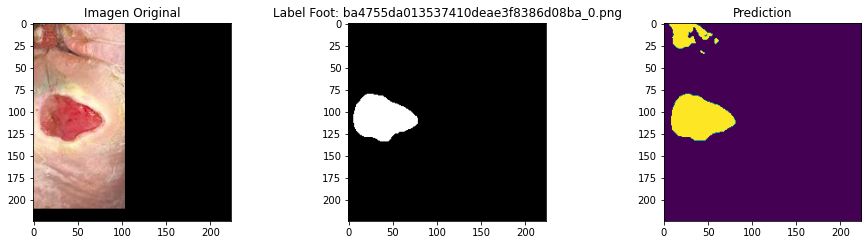

In [46]:
nroLabel = 6

# y_pred=model.predict(X_test)
# y_pred_thresholded = y_pred > 0.4
ground_truth = y_test[nroLabel]
img_original = X_test[nroLabel]

pred = y_pred_thresholded[nroLabel]
pred = np.squeeze(pred)

plt.figure(figsize=(16, 8))

plt.subplot(231)
plt.title('Imagen Original')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img_original)

plt.subplot(232)
plt.title('Label Foot: ' + X_filename[nroLabel]) 
plt.imshow(ground_truth)

plt.subplot(233)
plt.title('Prediction')
plt.imshow(pred)




#### Ploteo L vs P grupal:

podría agregar al costado la imagen original para poder interpretar un poco donde fallan las predicciones o a qué se deben las diferencias.

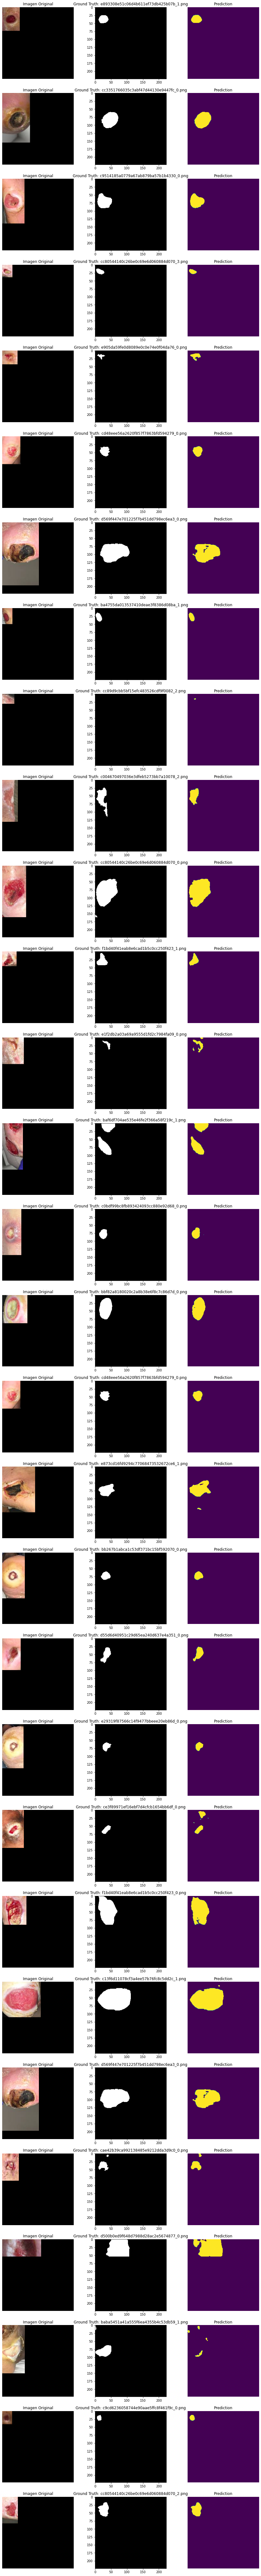

In [49]:
import matplotlib.pyplot as plt
from skimage import io # para poder leer y escribir cosas (imágenes)
import random

r, c = 30, 3
fig = plt.figure(figsize = (5*c, 5*r))
for _r in range(r): # itero por filas. como r = 4 --> _r toma valores 0,1,2 y 3
    ix = random.randint(0, len(pred)-1)
    for _c in range(c): # itero por columnas de cada fila
       
        plt.subplot(r,c, _r*c + _c + 1) #(nro filas , nro columnas, en que espacio me paro en cada iteración)         
        pred = y_pred_thresholded[ix]
        pred = np.squeeze(pred)
               
        ground_truth = y_test[ix]

        img_original = X_test[ix]
        img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

        if _c == 0: 
           plt.title("Imagen Original")
           plt.imshow(img_original)
           plt.axis(False) # saco ejes con numeros q molestan 

        if _c == 1:
          plt.title("Ground Truth: " + X_filename[ix]) # así puedo ubicar el archivo si quiero y ver la imagen original x ejemplo
          plt.imshow(ground_truth)
          
        if _c == 2: 
          plt.title("Prediction")
          plt.imshow(pred)
          plt.axis(False) # saco ejes con numeros q molestan 
        
plt.show()